# SALARY PROJECT

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Reading the Dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.isnull().sum() # No null values found

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df['rank'].unique()


array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [7]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [8]:
df['sex'].unique()
# Features rank,discipline,sex are text data hence applying Ordinal Encoder to tranform into categorical data

array(['Male', 'Female'], dtype=object)

In [9]:
ord_enc=OrdinalEncoder(categories=[["AsstProf","AssocProf","Prof"],["A","B"],["Male","Female"]])
df[["rank","discipline","sex"]]=ord_enc.fit_transform(df[["rank","discipline","sex"]])

In [10]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,0.0,139750
1,2.0,1.0,20,16,0.0,173200
2,0.0,1.0,4,3,0.0,79750
3,2.0,1.0,45,39,0.0,115000
4,2.0,1.0,40,41,0.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,0.0,103106
393,2.0,0.0,31,19,0.0,150564
394,2.0,0.0,42,25,0.0,101738
395,2.0,0.0,25,15,0.0,95329


# Visualization of dataset

# COUNT PLOT

<AxesSubplot:xlabel='rank', ylabel='count'>

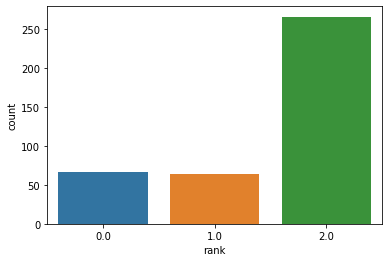

In [11]:
sns.countplot(df["rank"])
#rank feature is imbalanced in nature

<AxesSubplot:xlabel='discipline', ylabel='count'>

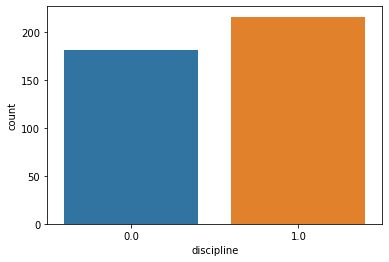

In [12]:
sns.countplot(df["discipline"])
#discpline feature is balanced in nature

<AxesSubplot:xlabel='sex', ylabel='count'>

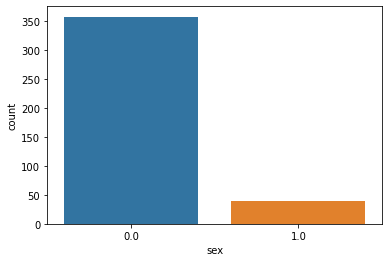

In [13]:
sns.countplot(df["sex"])
#sex feature is highly imbalanced

In [14]:
#Features rank and sex are imbalanced in nature hence applying following techniques
    #1. Check for Corelation and drop the column
    #2. Check for skewness
    #3. To apply ensemble techniques for modeling for optimized sampling of data

# Pair plot

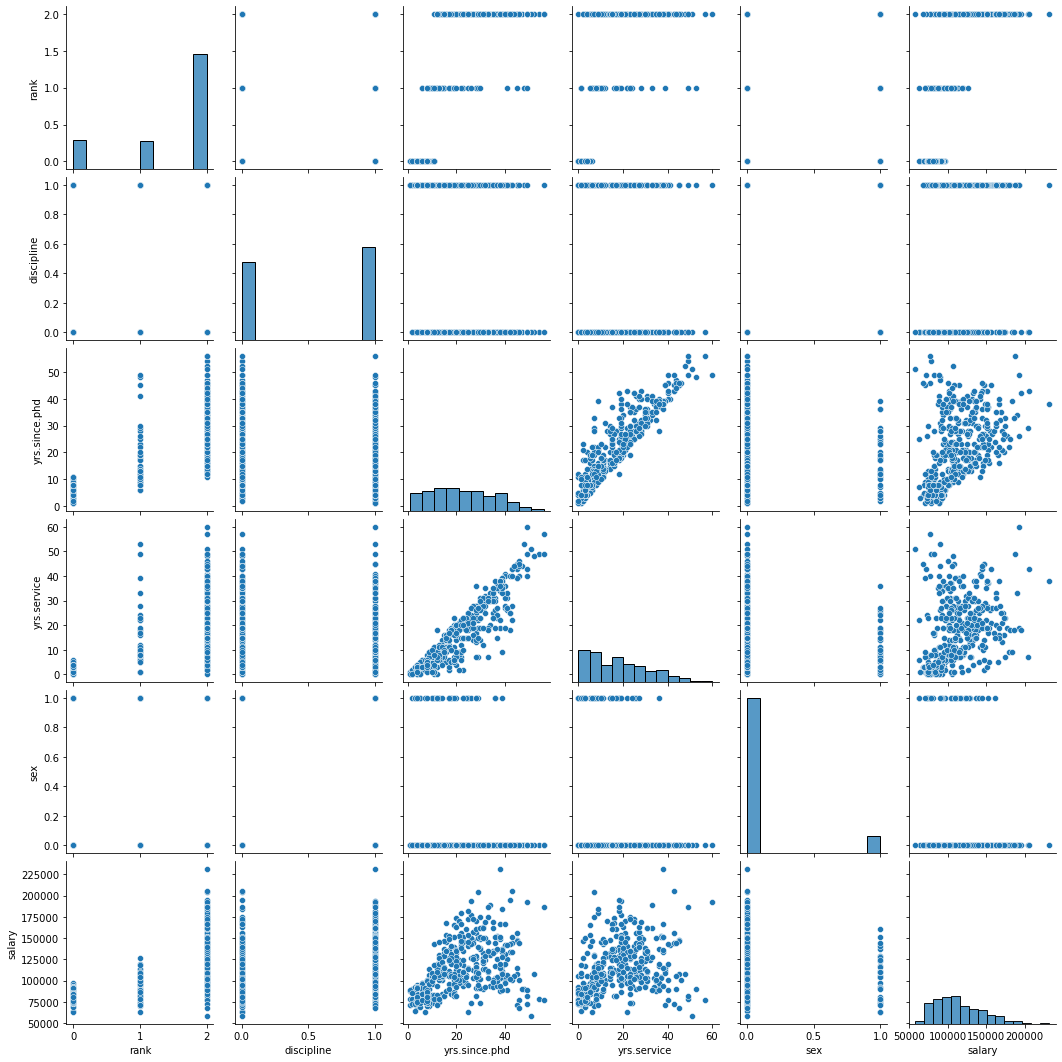

In [15]:
sns.pairplot(df)

# Scatter Plot

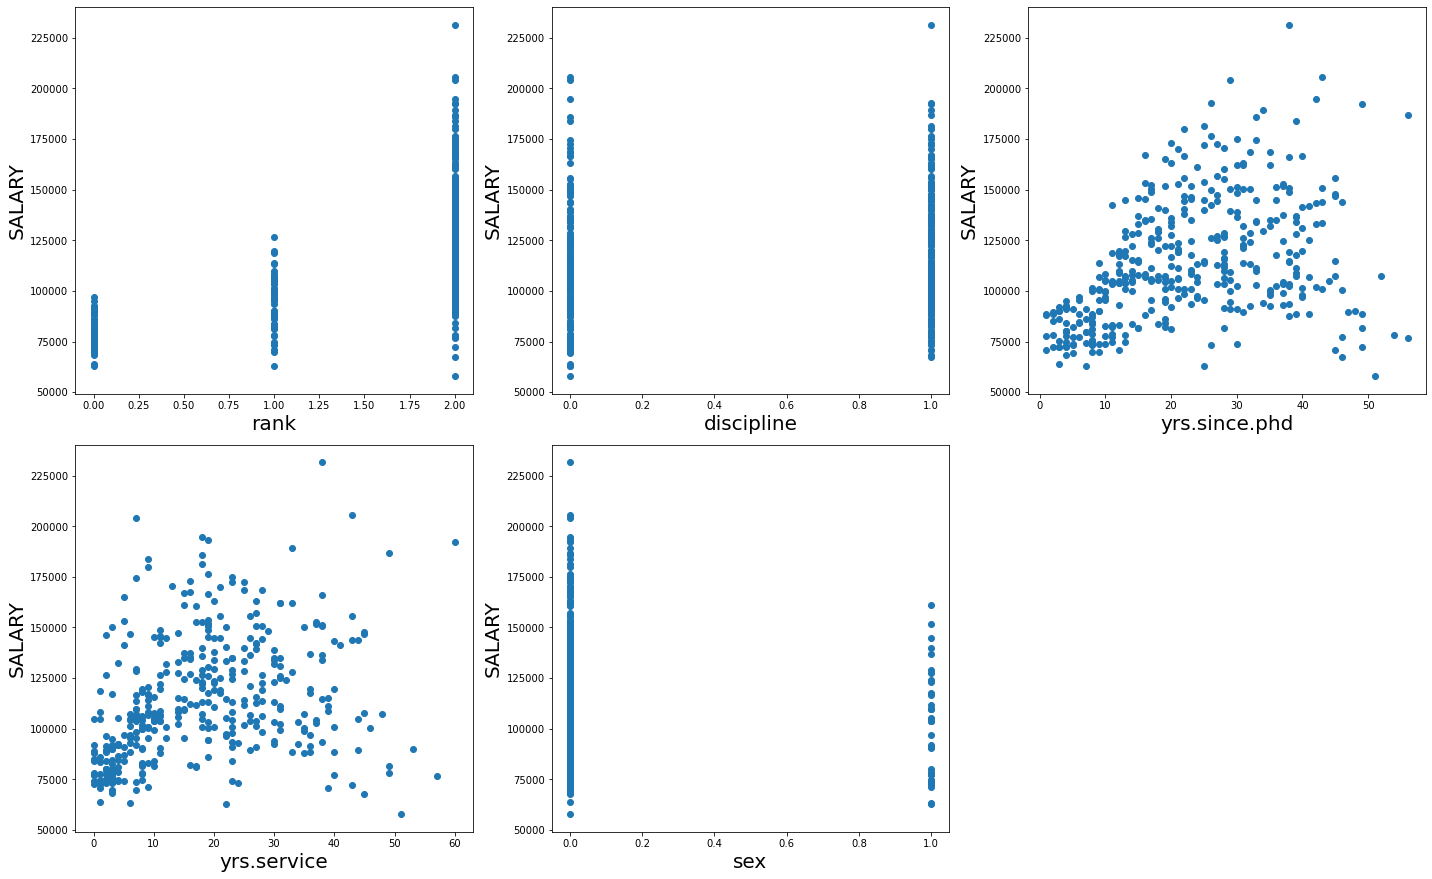

In [16]:
X=df.drop(columns='salary')
Y=df[['salary']]
plt.figure(figsize=(20,30))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SALARY',fontsize=20)
    plotnumber+=1
plt.tight_layout()

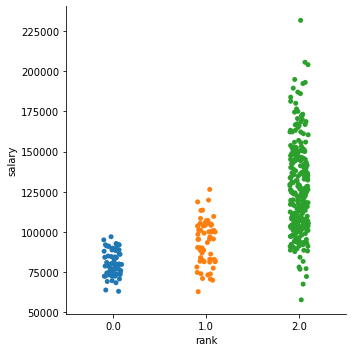

In [17]:
sns.catplot(x="rank", y="salary", data=df, jitter = True)

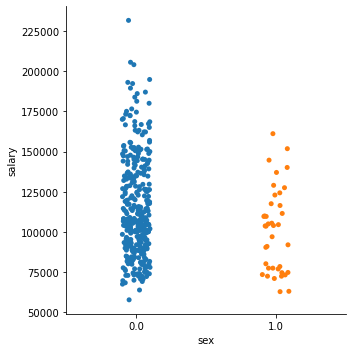

In [18]:
sns.catplot(x="sex", y="salary", data=df, jitter = True)

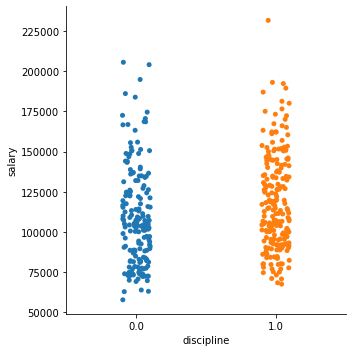

In [19]:
sns.catplot(x="discipline", y="salary", data=df, jitter = True)

In [20]:
# yrs.since.phd and yrs.service feature is having positive trend

# Box Plot

<AxesSubplot:>

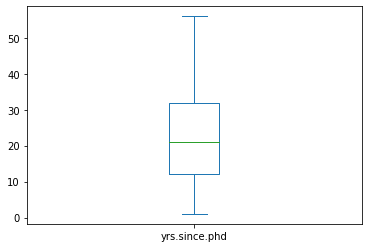

In [21]:
df["yrs.since.phd"].plot(kind="box")

<AxesSubplot:>

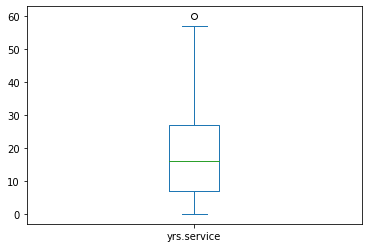

In [22]:
df['yrs.service'].plot(kind="box")  

In [23]:
#yrs.service has outlier and is right skewed

# Dist Plot

-1.1284741858358
-0.1770116626350349
0.29974153157458827
0.6481088240680348
2.6997084522172408
0.7118657337591157


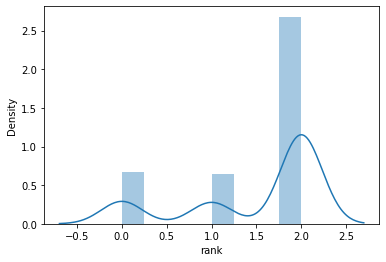

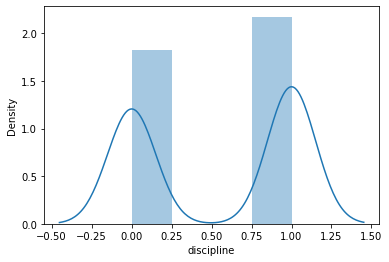

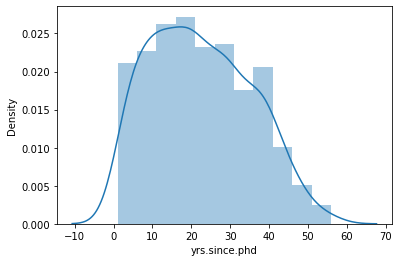

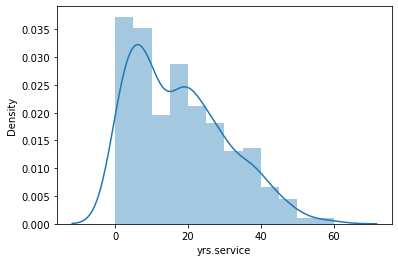

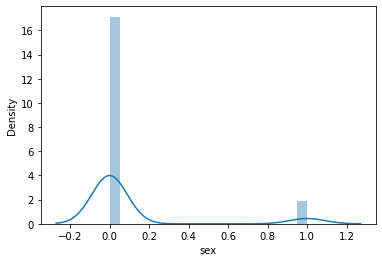

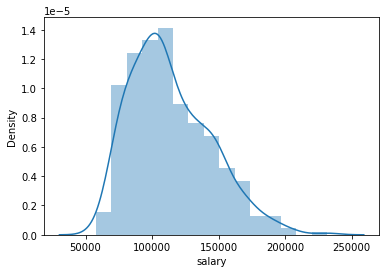

In [24]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [25]:
df.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

In [26]:
#yrs.service is slightly right skewed hence removing outlier using power tranformation

In [27]:
df["yrs.service"]=np.sqrt(df['yrs.service'])

# Rechecking for skewness and Outliers using Dist and Box plot

In [28]:
df.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service     -0.160353
sex              2.709958
salary           0.714568
dtype: float64

-1.1284741858358
-0.1770116626350349
0.29974153157458827
-0.15974634996880785
2.6997084522172408
0.7118657337591157


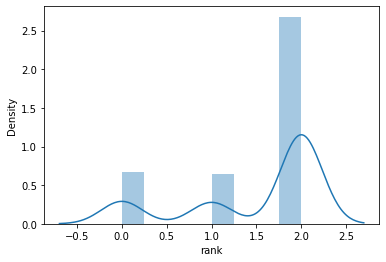

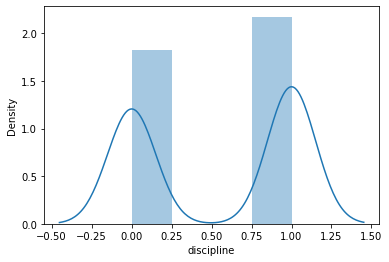

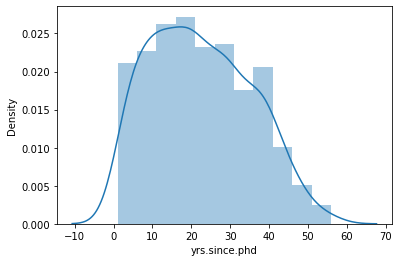

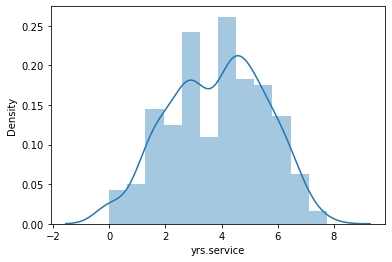

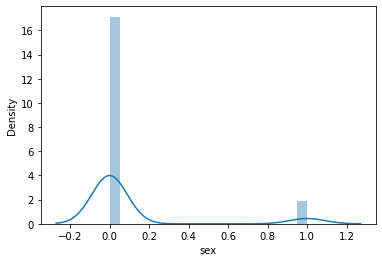

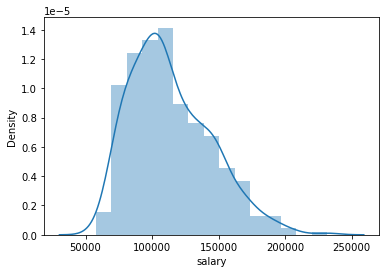

In [29]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

<AxesSubplot:>

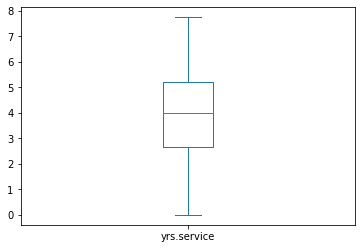

In [30]:
df['yrs.service'].plot(kind="box")  

<AxesSubplot:>

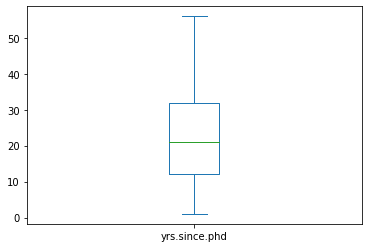

In [31]:
df["yrs.since.phd"].plot(kind="box")

In [32]:
# All outliers have been successfully removed 

# Heatmap and VIF

In [33]:
# To find corelation using Heatmap and VIF technique
df_corr=df.corr().abs()
df_corr

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,0.107365,0.700950,0.710596,0.138556,0.617224
discipline,0.107365,1.000000,0.218087,0.152398,0.003724,0.156084
yrs.since.phd,0.700950,0.218087,1.000000,0.899098,0.148788,0.419231
yrs.service,0.710596,0.152398,0.899098,1.000000,0.150439,0.402444
sex,0.138556,0.003724,0.148788,0.150439,1.000000,0.138610
salary,0.617224,0.156084,0.419231,0.402444,0.138610,1.000000


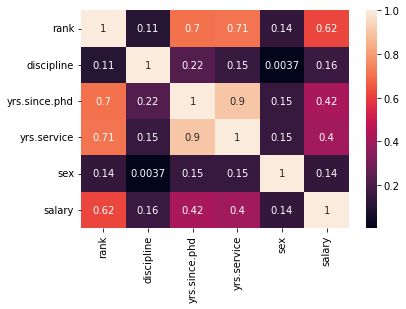

In [34]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [35]:
X=df.drop(columns='salary')
Y=df[['salary']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,2.112099,rank
1,1.063886,discipline
2,5.651152,yrs.since.phd
3,5.636445,yrs.service
4,1.026865,sex


In [36]:
# Corelation between features and label is moderate. yrs.sine.phd and yr.service are highly corelated indicated by vif
# As the feature sex is not highly correlated to the dependent variable and is highly imbalanced.Lets drop it.

In [37]:
 df.drop(columns="sex",inplace=True)

In [38]:
X=df.drop(columns='salary')
Y=df[['salary']]

# OLS

In [39]:
sm=smf.ols(formula='Y~X',data=df).fit()

In [40]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     76.44
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.17e-48
Time:                        12:52:08   Log-Likelihood:                -4544.8
No. Observations:                 397   AIC:                             9100.
Df Residuals:                     392   BIC:                             9120.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.071e+04   3389.262     20.863      0.000     6.4e+04    7.74e+04
X[0]        2.544e+04   2169.693     11.727      0.000    2.12e+04    2.97e+04
X[1]        1.445e+04   2370.441      6.095      0.000    9786.508    1.91e+04
X[2]         449.7893    211.433      2.127      0.034      34.106     865.473
X[3]       -3412.3741   1601.256     -2.131      0.034   -6560.497    -264.251
==============================================================================
Omnibus:                       47.869   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.868
Skew:                           0.737   Prob(JB):                     2.75e-18
Kurtosis:                       4.649   Cond. No.                         84.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# R2 value is 0.438
# Let us drop yrs.service as it is highly corelated with yrs.since.phd and check wether R2 value improves or not 

In [42]:
X1=X.drop(columns='yrs.service')

In [43]:
X1

,rank,discipline,yrs.since.phd
0,2.0,1.0,19
1,2.0,1.0,20
2,0.0,1.0,4
3,2.0,1.0,45
4,2.0,1.0,40
...,...,...,...
392,2.0,0.0,33
393,2.0,0.0,31
394,2.0,0.0,42
395,2.0,0.0,25


In [44]:
sm=smf.ols(formula='Y~X1',data=df).fit()

In [45]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     99.51
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           6.21e-48
Time:                        12:52:09   Log-Likelihood:                -4547.1
No. Observations:                 397   AIC:                             9102.
Df Residuals:                     393   BIC:                             9118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.764e+04   3080.432     21.956      0.000    6.16e+04    7.37e+04
X1[0]       2.428e+04   2108.761     11.512      0.000    2.01e+04    2.84e+04
X1[1]         1.4e+04   2371.735      5.903      0.000    9336.475    1.87e+04
X1[2]         90.1407    127.939      0.705      0.482    -161.389     341.671
==============================================================================
Omnibus:                       53.614   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.574
Skew:                           0.795   Prob(JB):                     2.91e-21
Kurtosis:                       4.786   Cond. No.                         78.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Dropping yrs.service feature is not improving the R2 value hence retaining it.

# Linear Regression Without Hyperparameter Tuning

In [47]:
scaler=StandardScaler() #Scaling
X_scaled=scaler.fit_transform(X)

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21) #Training Test split

In [49]:
lm=LinearRegression() # Applying Regression
lm.fit(X_train,Y_train) # Fitting the model

LinearRegression()

In [50]:
Y_pred=lm.predict(X_test) # Predicting the Test data
Y_pred_train=lm.predict(X_train) #Predicting the Train data

In [51]:
lm.score(X_train,Y_train)

0.43681685851327146

In [52]:
lm.score(X_test,Y_test)

0.44047473463768894

In [53]:
r2=r2_score(Y_test,Y_pred) #r2_score
r2

0.44047473463768894

In [54]:
cross_scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.44399004, 0.46259165, 0.34961987, 0.50069937, 0.3655911 ])

In [55]:
cross_scores.mean()

0.4244984050521059

In [56]:
mean_absolute_error(Y_test,Y_pred) #MAE

17373.307058368813

In [57]:
mean_squared_error(Y_test,Y_pred) #MSE

529280111.94510216

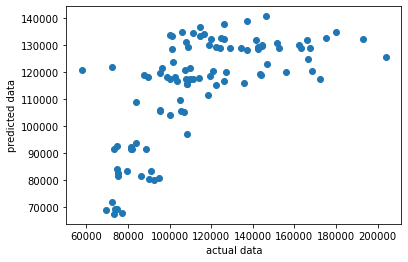

In [58]:
plt.scatter(Y_test,Y_pred) # Relation between actual and predicted data
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [59]:
# R-squared:	 0.44047473463768894
# mean_absolute_error= 17373.307058368813
# mean_squared_error= 529280111.94510216

# Linear Regression Using Ridge Regression

In [60]:
ridge=Ridge()

In [61]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

In [62]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [63]:
print(ridge_regressor.best_params_)

{'alpha': 5}


In [64]:
print(ridge_regressor.best_score_)

0.42521702992977284


In [65]:
Y_pred=ridge_regressor.predict(X_test)
Y_pred_train=ridge_regressor.predict(X_train)

In [66]:
ridge_regressor.score(X_train,Y_train)

0.4363974450864223

In [67]:
ridge_regressor.score(X_test,Y_test)

0.4387162560847844

In [68]:
r2=r2_score(Y_test,Y_pred)
r2

0.4387162560847844

In [69]:
cross_scores = cross_val_score(ridge_regressor, X_train, Y_train, scoring='r2', cv=5)
cross_scores   

array([0.43906071, 0.46290032, 0.35560469, 0.50639245, 0.36212698])

In [70]:
cross_scores.mean()

0.42521702992977284

In [71]:
mean_absolute_error(Y_test,Y_pred)

17314.65968510697

In [72]:
mean_squared_error(Y_test,Y_pred)

530943535.892065

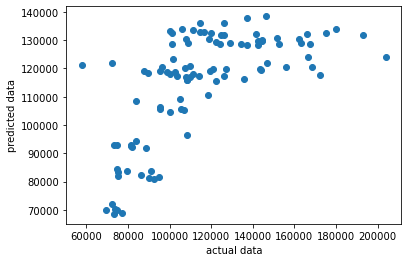

In [73]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [74]:
# R-squared:	0.4387162560847844
# mean_absolute_error= 17314.65968510697
# mean_squared_error=530943535.892065

# Random Forest MODEL

In [75]:
X=df.drop(columns='salary')
Y=df[['salary']]

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
Y_pred=rf.predict(X_test)

In [78]:
rf.score(X_train,Y_train)

0.8414436303016156

In [79]:
rf.score(X_test,Y_test)

0.4761636173739604

In [80]:
r2=r2_score(Y_test,Y_pred)
r2

0.4761636173739604

In [81]:
cross_scores = cross_val_score(rf, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.31889482, 0.3576213 , 0.15981326, 0.39656073, 0.22106422])

In [82]:
cross_scores.mean()

0.29079086569687596

In [83]:
mean_absolute_error(Y_test,Y_pred)

16098.752285847762

In [84]:
mean_squared_error(Y_test,Y_pred)

495520392.7345356

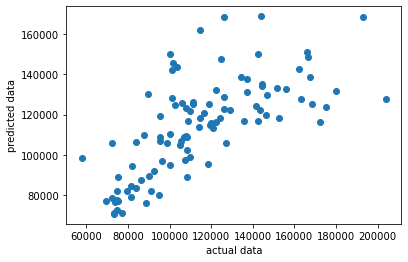

In [85]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [86]:
# R-squared:	0.4704012728661511
# mean_absolute_error= 16430.347389646464
# mean_squared_error= 500971253.5534562

# RANDOM FOREST WITH HYPER PARAMETER TUNING

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [88]:
rf1=RandomForestRegressor()

In [89]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['squared_error', 'absolute_error', 'poisson']}

In [90]:
clf1=GridSearchCV(rf1,param_grid,cv=3,n_jobs=-1)

In [91]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [92]:
clf1.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 8}

In [93]:
Y_pred=clf1.predict(X_test)

In [94]:
clf1.score(X_train,Y_train)


0.47029627379540373

In [95]:
clf1.score(X_test,Y_test)

0.3474943554305423

In [96]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.26516331, 0.26201276, 0.20701202, 0.41334695, 0.27247262])

In [97]:
r2=r2_score(Y_test,Y_pred)
r2

0.3474943554305423

In [98]:
cross_scores.mean()

0.28400153372259157

In [99]:
mean_absolute_error(Y_test,Y_pred)

19550.538813278497

In [100]:
mean_squared_error(Y_test,Y_pred)

617234434.2286363

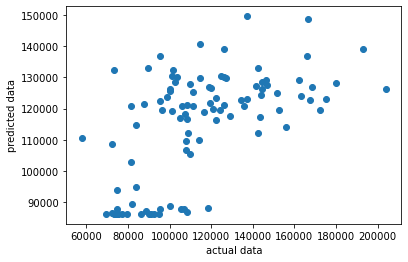

In [101]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [102]:
# R-squared:	0.33986460509565897
# mean_absolute_error= 19502.641348930145
# mean_squared_error= 624451758.2019252

# GRADIENT BOOSTING

In [103]:
X=df.drop(columns='salary')
Y=df[['salary']]

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [105]:
gbdt=GradientBoostingRegressor()

In [106]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [107]:
Y_pred=gbdt.predict(X_test)

In [108]:
gbdt.score(X_train,Y_train)

0.7408821057636115

In [109]:
gbdt.score(X_test,Y_test)

0.46503277812738

In [110]:
r2=r2_score(Y_test,Y_pred)
r2

0.46503277812738

In [111]:
cross_scores = cross_val_score(gbdt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.31423344, 0.38708387, 0.19902862, 0.35832636, 0.27981818])

In [112]:
cross_scores.mean()

0.30769809401140485

In [113]:
mean_absolute_error(Y_test,Y_pred)

16463.82821423259

In [114]:
mean_squared_error(Y_test,Y_pred)

506049554.16330177

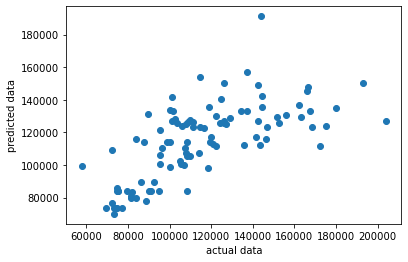

In [115]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [116]:
# R-squared:	0.4650589801737611
# mean_absolute_error= 16457.656535597296
# mean_squared_error= 506024768.4692495

# GBDT WITH HYPER PARAMETER

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [118]:
gbdt1=GradientBoostingRegressor()

In [119]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}

In [120]:
clf1=GridSearchCV(gbdt1,param_grid,cv=3,n_jobs=-1)

In [121]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [122]:
clf1.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [123]:
Y_pred=clf1.predict(X_test)

In [124]:
clf1.score(X_train,Y_train)


0.6338420614382798

In [125]:
clf1.score(X_test,Y_test)

0.4688416623342565

In [126]:
r2=r2_score(Y_test,Y_pred)
r2

0.4688416623342565

In [127]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.30635629, 0.43748895, 0.31712055, 0.52863465, 0.2726533 ])

In [128]:
cross_scores.mean()

0.37245075051680887

In [129]:
mean_absolute_error(Y_test,Y_pred)

16531.97245132047

In [130]:
mean_squared_error(Y_test,Y_pred)

502446559.2956864

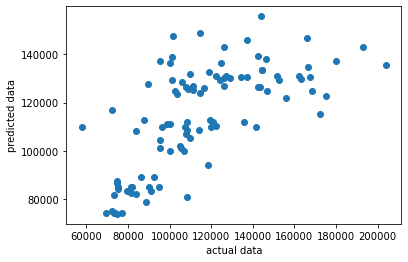

In [131]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [132]:
# R-squared:	0.4691886469093759
# mean_absolute_error= 16528.293531033883
# mean_squared_error= 502118330.98120004

# DECISION TREE MODEL

In [133]:
X=df.drop(columns='salary')
Y=df[['salary']]

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [135]:
Y_pred=dt.predict(X_test)

In [136]:
dt.score(X_train,Y_train)

0.9134629505526406

In [137]:
dt.score(X_test,Y_test)

0.188826684422708

In [138]:
r2=r2_score(Y_test,Y_pred)
r2

0.188826684422708

In [139]:
cross_scores = cross_val_score(dt, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([ 0.31492607,  0.16765022, -0.00645176, -0.19801351, -0.18492941])

In [140]:
cross_scores.mean()

0.01863632071509034

In [141]:
mean_absolute_error(Y_test,Y_pred)

19820.135833333334

In [142]:
mean_squared_error(Y_test,Y_pred)

767325319.9703473

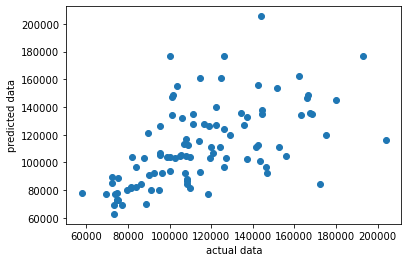

In [143]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [144]:
# R-squared:	0.23805299497681498
# mean_absolute_error= 19057.715833333335
# mean_squared_error=720759938.9703473

# DECISION TREE WITH HYPER PARAMETER TUNING

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [146]:
dt1=DecisionTreeRegressor()

In [147]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [148]:
clf1=GridSearchCV(dt1,param_grid,cv=3,n_jobs=-1)

In [149]:
clf1.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [150]:
clf1.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [151]:
Y_pred=clf1.predict(X_test)

In [152]:
clf1.score(X_train,Y_train)


0.47318351557621663

In [153]:
clf1.score(X_test,Y_test)

0.45152959210617194

In [154]:
r2=r2_score(Y_test,Y_pred)
r2

0.45152959210617194

In [155]:
cross_scores = cross_val_score(clf1, X_train, Y_train, scoring='r2', cv=5)
cross_scores 

array([0.44107867, 0.3712428 , 0.18155888, 0.41968591, 0.16267148])

In [156]:
cross_scores.mean()

0.3152475469857313

In [157]:
mean_absolute_error(Y_test,Y_pred)

17001.510997119156

In [158]:
mean_squared_error(Y_test,Y_pred)

518822825.09735453

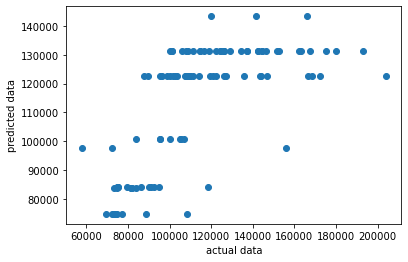

In [159]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [160]:
# R-squared:	 0.45152959210617194
# mean_absolute_error= 17001.510997119156
# mean_squared_error= 518822825.09735453

# CONCLUSION

In [161]:
# 1. 4 models were fitted on the dataset mainly Linear regression,Random Forest, Decision tree & GBDT without and with Hypertparameter Tuning
# 2. Among the models the optimized Result was achieved using Random Forest without hyperparameter tuning
# 3. Result:
    # Model: Random Forest without hyperparameter tuning
    # R-squared:	0.4704012728661511
    # mean_absolute_error= 16430.347389646464
    # mean_squared_error= 500971253.5534562
#  The predictors in this case give 47% of the variance, which is justified because there are still other factors that
#  can contribute to determine the salary. 

    

In [162]:
md=[lm,rf,dt,gbdt] # Saving
import pickle
filename="Salary.pkl"
pickle.dump(md,open(filename,"wb"))